# Rainfall and Ground Water Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gwl_data = pd.read_csv("GWL_final.csv")
gwl_data.head()

,station,Ane,Bhadalwadi,Bukum,Dhumalwadi,Dorlewadi,Jejuri,Junnar,Karanje,Kolwan,...,Belhe-1,Kamunde,Khadki,Wagholi-1,Zendewadi-1,Baramati,Khutbhav_1,Parawadi,Kauthe_1,Khadakwasala_3
0,2000-01-01 00:00:00,5.00,2.40,0.55,5.50,4.60,1.40,4.40,6.40,1.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-05-01 00:00:00,4.43,1.58,0.84,7.95,NaN,3.20,5.38,5.22,1.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-08-01 00:00:00,3.07,0.01,0.34,8.54,5.15,1.94,4.23,5.20,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-11-01 00:00:00,4.66,0.45,0.47,12.56,4.55,5.60,4.09,8.04,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01 00:00:00,5.38,0.13,0.67,10.80,6.33,4.95,5.16,6.93,1.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gwl_data.isna().sum()

station                  0
Ane                     13
Bhadalwadi              16
Bukum                   15
Dhumalwadi              12
Dorlewadi                9
Jejuri                   7
Junnar                  10
Karanje                  6
Kolwan                   9
Lonawala                 8
Loni (Ambegaon)         10
Mulshi                  25
Narayangaon              5
Narayanpur              14
Nimbgaon-Ketke          15
Otur                     6
Pangre Sailar Basti     10
Parne                    6
Patas                    5
Pimpri (Kh) Malvasti     5
Pune                     6
Rajgurnagar (Khed)       8
Sakurde                  7
Shivpur Khed            10
Undavri Kade Pathar     11
Wehle                   11
Khutbhav_Pz             37
Mahalunge Padval_Pz     51
Pabal New               48
Kharabwadi              57
Shikrapur               50
Ausari Khurd-1          60
Kamatwadi-Walha         56
Kamshet                 54
Kasurdi-1               58
Kolawade                56
A

In [4]:
gwl_data['station'].duplicated().sum()

0

In [5]:
gwl_data.rename(columns={'station':'Date'},inplace=True)
gwl_data['Date'] = pd.to_datetime(gwl_data['Date'])
gwl_data.head()

,Date,Ane,Bhadalwadi,Bukum,Dhumalwadi,Dorlewadi,Jejuri,Junnar,Karanje,Kolwan,...,Belhe-1,Kamunde,Khadki,Wagholi-1,Zendewadi-1,Baramati,Khutbhav_1,Parawadi,Kauthe_1,Khadakwasala_3
0,2000-01-01,5.00,2.40,0.55,5.50,4.60,1.40,4.40,6.40,1.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-05-01,4.43,1.58,0.84,7.95,NaN,3.20,5.38,5.22,1.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-08-01,3.07,0.01,0.34,8.54,5.15,1.94,4.23,5.20,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-11-01,4.66,0.45,0.47,12.56,4.55,5.60,4.09,8.04,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01,5.38,0.13,0.67,10.80,6.33,4.95,5.16,6.93,1.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(gwl_data.Date.dtype)

datetime64[ns]


In [7]:
len(gwl_data.columns)

48

In [8]:
print(gwl_data.isna().sum() > 45)

Date                    False
Ane                     False
Bhadalwadi              False
Bukum                   False
Dhumalwadi              False
Dorlewadi               False
Jejuri                  False
Junnar                  False
Karanje                 False
Kolwan                  False
Lonawala                False
Loni (Ambegaon)         False
Mulshi                  False
Narayangaon             False
Narayanpur              False
Nimbgaon-Ketke          False
Otur                    False
Pangre Sailar Basti     False
Parne                   False
Patas                   False
Pimpri (Kh) Malvasti    False
Pune                    False
Rajgurnagar (Khed)      False
Sakurde                 False
Shivpur Khed            False
Undavri Kade Pathar     False
Wehle                   False
Khutbhav_Pz             False
Mahalunge Padval_Pz      True
Pabal New                True
Kharabwadi               True
Shikrapur                True
Ausari Khurd-1           True
Kamatwadi-

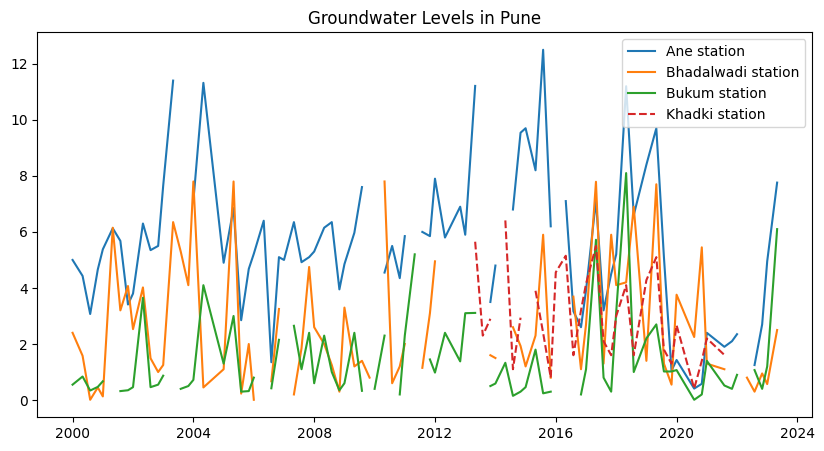

In [55]:
plt.figure(figsize=(10, 5))
plt.title("Groundwater Levels in Pune")
for col in gwl_data.columns[1:4]:
    plt.plot(gwl_data['Date'], gwl_data[col], label=f"{col} station")
plt.plot(gwl_data['Date'],gwl_data['Khadki'], linestyle = '--' ,label="Khadki station")
plt.legend()
plt.show()

In [10]:
rainfall_data = pd.read_csv("rain_final.csv")
rainfall_data.head()

,DateTime,Month,Rainfall
0,2000-01,2000-01-16 00:00:00,0.000000
1,2000-02,2000-02-15 00:00:00,0.000000
2,2000-03,2000-03-16 00:00:00,0.000000
3,2000-04,2000-04-15 12:00:00,0.000000
4,2000-05,2000-05-16 00:00:00,0.776626


In [11]:
rainfall_data.isna().sum()

DateTime    0
Month       0
Rainfall    0
dtype: int64

In [12]:
rainfall_data.drop(columns=['Month'],inplace=True)

In [13]:
rainfall_data['DateTime'] = pd.to_datetime(rainfall_data['DateTime'])

In [14]:
rainfall_data.rename(columns = {'DateTime':'Date'},inplace=True)

In [15]:
print(rainfall_data.columns[0])

Date


In [38]:
gwl_rain = pd.merge(rainfall_data, gwl_data, on='Date',how='outer')
gwl_rain.to_csv("gwl_mid.csv")
gwl_rain.head()

,Date,Rainfall,Ane,Bhadalwadi,Bukum,Dhumalwadi,Dorlewadi,Jejuri,Junnar,Karanje,...,Belhe-1,Kamunde,Khadki,Wagholi-1,Zendewadi-1,Baramati,Khutbhav_1,Parawadi,Kauthe_1,Khadakwasala_3
0,2000-01-01,0.000000,5.00,2.40,0.55,5.50,4.6,1.4,4.40,6.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,0.776626,4.43,1.58,0.84,7.95,NaN,3.2,5.38,5.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
l = len(gwl_rain.columns)
print("No of. Columns: ", l)
dropper = list()
for col in gwl_rain.columns:
    if gwl_rain[col].isna().sum() > 0.9*gwl_rain.shape[0]: #Removing the columns that have mote than 90% missing values
        dropper.append(col)
print(len(dropper), "columns to dropped are: ",dropper)

gwl_rain.drop(columns = dropper, inplace=True)

gwl_rain.shape[0]
# gwl_rain.head()

No of. Columns:  49
6 columns to dropped are:  ['Kamunde', 'Baramati', 'Khutbhav_1', 'Parawadi', 'Kauthe_1', 'Khadakwasala_3']


288

In [40]:
gwl_rain['Rainfall'] = gwl_rain['Rainfall'].replace(0,0.001)
gwl_rain.head()

,Date,Rainfall,Ane,Bhadalwadi,Bukum,Dhumalwadi,Dorlewadi,Jejuri,Junnar,Karanje,...,Ausari Khurd-1,Kamatwadi-Walha,Kamshet,Kasurdi-1,Kolawade,Ale-1,Belhe-1,Khadki,Wagholi-1,Zendewadi-1
0,2000-01-01,0.001000,5.00,2.40,0.55,5.50,4.6,1.4,4.40,6.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,0.776626,4.43,1.58,0.84,7.95,NaN,3.2,5.38,5.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
##Predictive Imputation

df = gwl_rain

from sklearn.ensemble import RandomForestRegressor

# Convert Date column to datetime and extract time-based features
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month  # Capture seasonality
df['Year'] = df['Date'].dt.year

for col in gwl_rain.columns[2:-2]:
    #Seperate Known data from unknown data
    df_known = df[df[col].notna()]
    df_missing = df[df[col].isna()]

    #Training the model on known data
    X_train = df_known[['Rainfall', 'Month', 'Year']]
    y_train = df_known[col]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values
    X_missing = df_missing[['Rainfall', 'Month', 'Year']]
    df.loc[df[col].isna(), col] = model.predict(X_missing)

In [42]:
gwl_rain.head()

,Date,Rainfall,Ane,Bhadalwadi,Bukum,Dhumalwadi,Dorlewadi,Jejuri,Junnar,Karanje,...,Kamshet,Kasurdi-1,Kolawade,Ale-1,Belhe-1,Khadki,Wagholi-1,Zendewadi-1,Month,Year
0,2000-01-01,0.001000,5.0000,2.4000,0.5500,5.5000,4.6000,1.4000,4.4000,6.4000,...,3.8868,5.5213,4.3063,10.7831,13.0093,4.8556,4.3151,11.4266,1,2000
1,2000-02-01,0.001000,4.8683,2.1690,0.5665,6.0797,4.6792,2.3848,4.6084,6.3339,...,3.8868,5.5213,4.3063,10.7831,13.0093,4.8556,4.3151,11.4266,2,2000
2,2000-03-01,0.001000,4.8683,2.1690,0.5665,6.0797,4.6792,2.3848,4.6084,6.3339,...,3.8868,5.5213,4.3063,10.7831,13.0093,4.8556,4.3151,11.4266,3,2000
3,2000-04-01,0.001000,6.5340,4.6136,2.5064,8.1365,5.0671,3.2207,5.6388,6.5115,...,3.9670,5.1653,4.8721,11.3810,15.1367,5.1720,5.0036,11.6632,4,2000
4,2000-05-01,0.776626,4.4300,1.5800,0.8400,7.9500,5.6640,3.2000,5.3800,5.2200,...,2.4401,4.2708,4.9702,10.3325,14.3558,5.0241,4.7180,9.5727,5,2000


In [43]:
gwl_rain.isna().sum()

Date                    0
Rainfall                0
Ane                     0
Bhadalwadi              0
Bukum                   0
Dhumalwadi              0
Dorlewadi               0
Jejuri                  0
Junnar                  0
Karanje                 0
Kolwan                  0
Lonawala                0
Loni (Ambegaon)         0
Mulshi                  0
Narayangaon             0
Narayanpur              0
Nimbgaon-Ketke          0
Otur                    0
Pangre Sailar Basti     0
Parne                   0
Patas                   0
Pimpri (Kh) Malvasti    0
Pune                    0
Rajgurnagar (Khed)      0
Sakurde                 0
Shivpur Khed            0
Undavri Kade Pathar     0
Wehle                   0
Khutbhav_Pz             0
Mahalunge Padval_Pz     0
Pabal New               0
Kharabwadi              0
Shikrapur               0
Ausari Khurd-1          0
Kamatwadi-Walha         0
Kamshet                 0
Kasurdi-1               0
Kolawade                0
Ale-1       

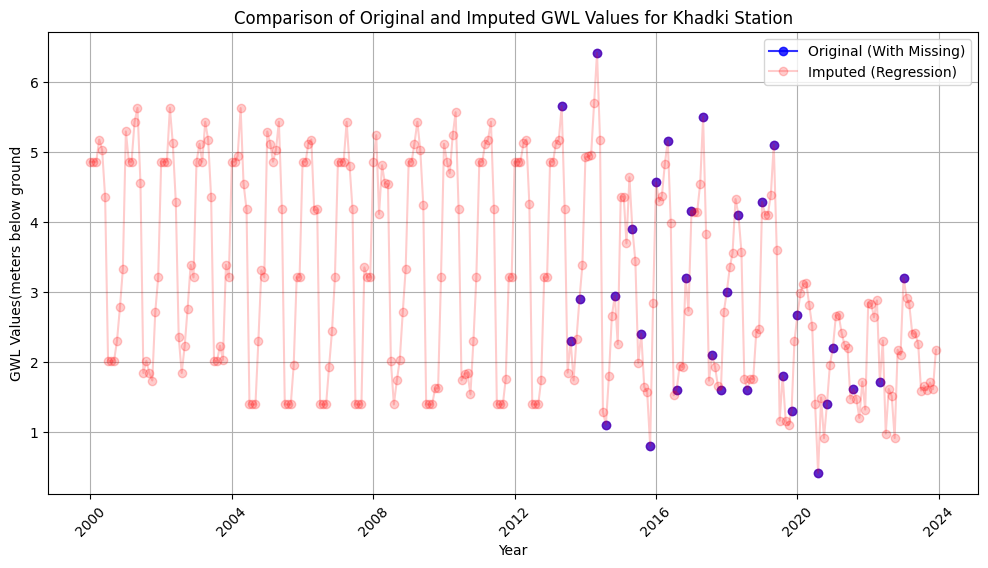

In [44]:
import matplotlib.pyplot as plt

gwl_mid = pd.read_csv("gwl_mid.csv")
# Plot original column1 with missing values
plt.figure(figsize=(12, 6))
plt.plot(gwl_rain['Date'], gwl_mid['Khadki'], 'bo-', label='Original (With Missing)', alpha=0.8)  # Original data
plt.plot(gwl_rain['Date'], gwl_rain['Khadki'], 'ro-', label='Imputed (Regression)', alpha=0.2)  # Imputed data
# plt.plot(gwl_rain['Date'], gwl_rain['Rainfall'], linestyle='--', label='Rainfall')  
# Formatting the plot
plt.xlabel('Year')
plt.ylabel('GWL Values(meters below ground')
plt.title('Comparison of Original and Imputed GWL Values for Khadki Station')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

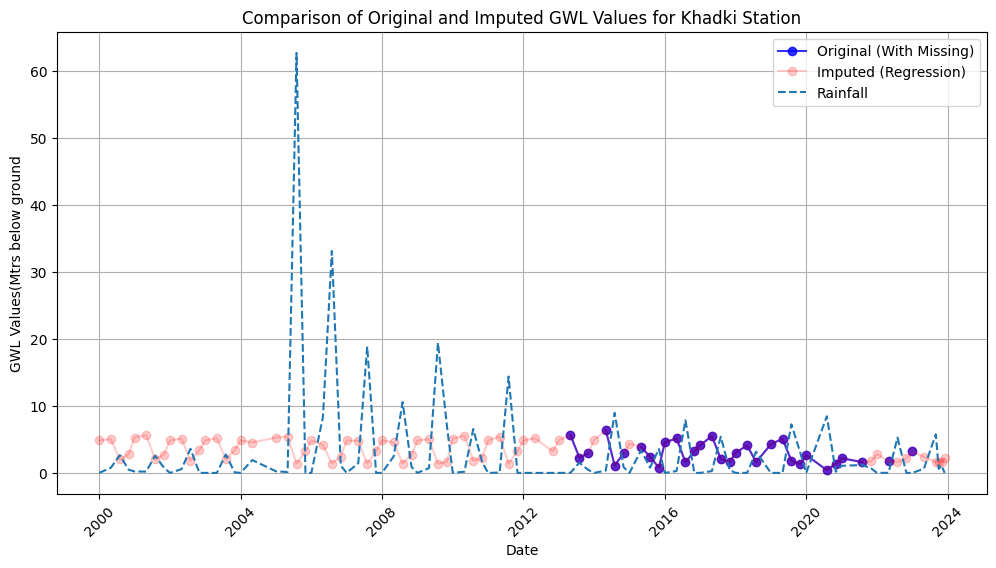

In [33]:
import matplotlib.pyplot as plt

# Plot original column1 with missing values
plt.figure(figsize=(12, 6))
plt.plot(gwl_rain['Date'], gwl_data['Khadki'], 'bo-', label='Original (With Missing)', alpha=0.8)  # Original data
plt.plot(gwl_rain['Date'], gwl_rain['Khadki'], 'ro-', label='Imputed (Regression)', alpha=0.2)  # Imputed data
plt.plot(gwl_rain['Date'], gwl_rain['Rainfall'], linestyle='--', label='Rainfall')  
# Formatting the plot
plt.xlabel('Date')
plt.ylabel('GWL Values(Mtrs below ground')
# plt.ylabel2('Rainfall (Cms.)')
plt.title('Comparison of Original and Imputed GWL Values for Khadki Station')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipykernel_124637/2020201935.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gwl_rain['Date'], gwl_mid['Bhadalwadi'], 'bo-', color='r', label='Original (With Missing)', alpha=1)  # Original data


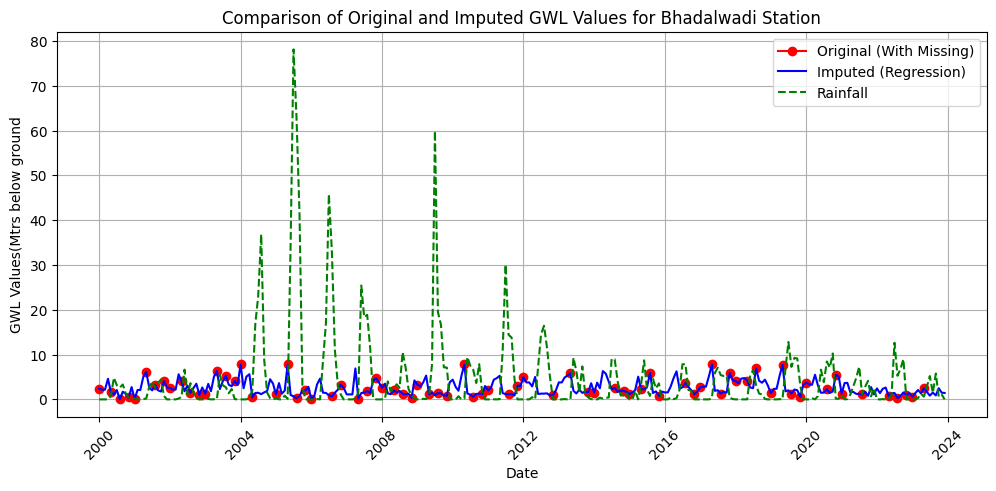

In [74]:
# Plot original column1 with missing values
plt.figure(figsize=(12, 5))
plt.plot(gwl_rain['Date'], gwl_mid['Bhadalwadi'], 'bo-', color='r', label='Original (With Missing)', alpha=1)  # Original data
plt.plot(gwl_rain['Date'], gwl_rain['Bhadalwadi'], color='b',label='Imputed (Regression)', alpha=1)  # Imputed data
plt.plot(gwl_rain['Date'], gwl_rain['Rainfall'], color='g',linestyle='--', label='Rainfall')  
# Formatting the plot
plt.xlabel('Date')
plt.ylabel('GWL Values(Mtrs below ground')
# plt.ylabel2('Rainfall (Cms.)')
plt.title('Comparison of Original and Imputed GWL Values for Bhadalwadi Station')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

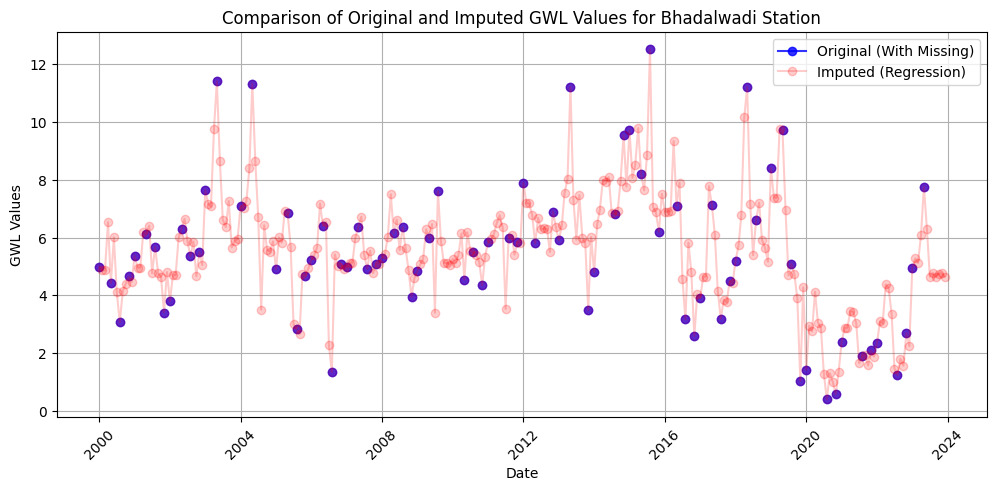

In [58]:
import matplotlib.pyplot as plt

# Plot original column1 with missing values
plt.figure(figsize=(12, 5))
plt.plot(gwl_rain['Date'], gwl_mid['Ane'], 'bo-', label='Original (With Missing)', alpha=0.8)  # Original data
plt.plot(gwl_rain['Date'], gwl_rain['Ane'], 'ro-', label='Imputed (Regression)', alpha=0.2)  # Imputed data

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('GWL Values')
plt.title('Comparison of Original and Imputed GWL Values for Bhadalwadi Station')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
gwl_rain.to_csv("gwl_rain_processed2.csv")

# Pollution Data

In [24]:
wq_data= pd.read_csv("wq_final.csv")
wq_data.head()

,Month,pH,dissolved_oxygen,BOD,COD,Nitrate,Fecal_Coliform,WQI
0,January-2012,7.61,1.2,13.5,44.0,0.26,350,36.09
1,February-2012,7.65,0.9,14.5,44.0,0.28,350,34.65
2,March-2012,7.26,BDL,17.0,52.0,1.68,425,33.23
3,April-2012,7.25,1,13.5,44.0,0.36,425,37.12
4,May-2012,8.24,1.3,15.0,44.0,0.26,550,30.46


In [25]:
wq_data.isna().sum()

Month               0
pH                  1
dissolved_oxygen    2
BOD                 1
COD                 2
Nitrate             2
Fecal_Coliform      7
WQI                 1
dtype: int64

In [26]:
wq_data['Month'] = pd.to_datetime(wq_data['Month'], format="%B-%Y")

In [27]:
wq_data.head()

,Month,pH,dissolved_oxygen,BOD,COD,Nitrate,Fecal_Coliform,WQI
0,2012-01-01,7.61,1.2,13.5,44.0,0.26,350,36.09
1,2012-02-01,7.65,0.9,14.5,44.0,0.28,350,34.65
2,2012-03-01,7.26,BDL,17.0,52.0,1.68,425,33.23
3,2012-04-01,7.25,1,13.5,44.0,0.36,425,37.12
4,2012-05-01,8.24,1.3,15.0,44.0,0.26,550,30.46


In [42]:
for col in wq_data.columns[1:]:
    wq_data[col] = wq_data[col].apply(pd.to_numeric, errors='coerce')
    
wq_data.isna().sum()


Month                0
pH                   1
dissolved_oxygen    28
BOD                  1
COD                  2
Nitrate              6
Fecal_Coliform      20
WQI                 19
dtype: int64